In [1]:
import numpy as np
import scipy as sp
from scipy.optimize import leastsq
import matplotlib.pyplot as plt
%matplotlib inline

In [27]:
# 目标函数
def real_func(x):
    return np.sin(2*np.pi*x)

# 多项式
def fit_func(p, x):
    f = np.poly1d(p)
    return f(x)

# 残差
def residuals_func(p, x, y):
    ret = fit_func(p, x) - y
    return ret

In [26]:
# 十个点
x = np.linspace(0, 1, 10)
x_points = np.linspace(0, 1, 1000)
# 加上正态分布噪音的目标函数的值
y_ = real_func(x)
y = [np.random.normal(0, 0.1) + y1 for y1 in y_]
def fitting(M=0):
    """
    M    为 多项式的次数
    """
    # 随机初始化多项式参数
    p_init = np.random.rand(M + 1)
    # 最小二乘法
    p_lsq = leastsq(residuals_func, p_init, args=(x, y))
    print('Fitting Parameters:', p_lsq[0])

    # 可视化
    plt.plot(x_points, real_func(x_points), label='real')
    plt.plot(x_points, fit_func(p_lsq[0], x_points), label='fitted curve')
    plt.plot(x, y, 'bo', label='noise')
    plt.legend()
    return p_lsq

Fitting Parameters: [ 1.00232567e+04 -4.37206094e+04  8.00827935e+04 -8.01087663e+04
  4.75399373e+04 -1.69124079e+04  3.44090532e+03 -3.64059793e+02
  1.87283921e+01  1.22022630e-01]


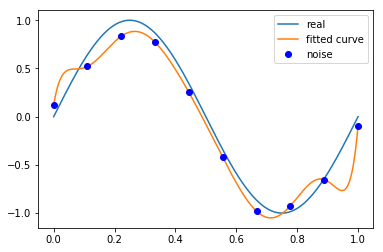

In [28]:
# M=9
p_lsq_9 = fitting(M=9)

In [18]:
regularization = 0.0001


def residuals_func_regularization(p, x, y):
    ret = fit_func(p, x) - y
    ret = np.append(ret,np.sqrt(0.5 * regularization * np.square(p)))  # L2范数作为正则化项
    return ret

In [19]:
p_init = np.random.rand(9 + 1)
p_lsq_regularization = leastsq(
    residuals_func_regularization, p_init, args=(x, y))


[ -6.1594027   -0.53541347   3.17078794   5.07410939   5.42702211
   3.95341746  -1.94847452 -16.94605528   7.91736118   0.07917167]


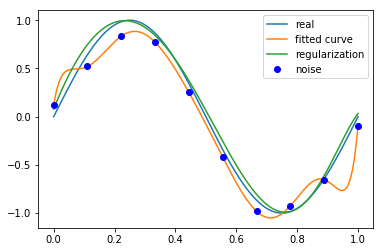

In [29]:
plt.plot(x_points, real_func(x_points), label='real')
plt.plot(x_points, fit_func(p_lsq_9[0], x_points), label='fitted curve')
plt.plot(
    x_points,
    fit_func(p_lsq_regularization[0], x_points),
    label='regularization')
plt.plot(x, y, 'bo', label='noise')
plt.legend()